In [1]:
import sys
sys.path.append('./pytorch-forecasting/')
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import pandas as pd
import torch
from pytorch_forecasting import NBeats, TimeSeriesDataSet
from pytorch_forecasting.data import NaNLabelEncoder

In [12]:
# Read the datasets into DataFrames
data = {
    'L1_i3': pd.read_csv('./RIWWER/Bellinge/2_cleaned_data/G71F04R_Level1_iFixp3_proc_v6.csv'),
    'L2_i3': pd.read_csv('./RIWWER/Bellinge/2_cleaned_data/G71F04R_Level2_iFixp3_proc_v6.csv'),
    'L1_i4': pd.read_csv('./RIWWER/Bellinge/2_cleaned_data/G71F04R_Level1_iFixp4_proc_v6.csv'),
    'L2_i4': pd.read_csv('./RIWWER/Bellinge/2_cleaned_data/G71F04R_Level2_iFixp4_proc_v6.csv')
}

# Set Datetime as index and replace NaNs with 0's
for k in data:
    data[k]['time'] = pd.to_datetime(data[k]['time'])
    data[k].fillna(0.0, inplace=True)

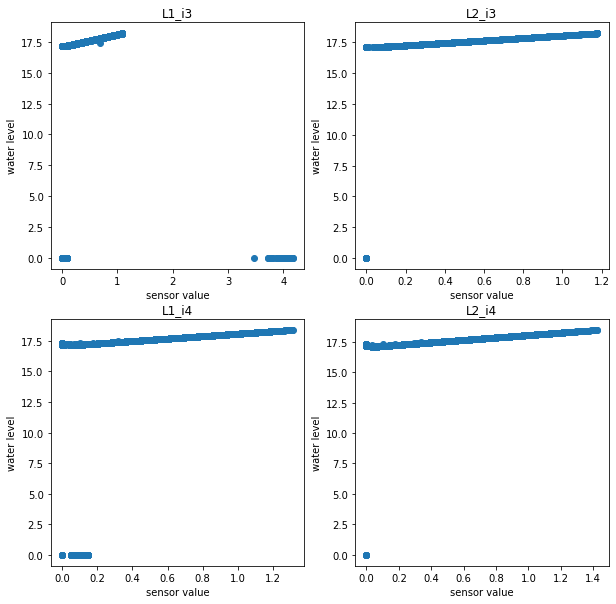

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
for i, k in enumerate(data):
    plt.subplot(2, 2, i+1)
    plt.scatter(x=data[k]['raw_value'], y=data[k]['level'])
    plt.xlabel('sensor value'); plt.ylabel('water level')
    plt.title(k)
plt.show()